# Análise de Classificadores

Para dar início aos estudos, vamos seguir com dataset do Kaggle
https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
## importando as bibliotecas

import pandas as pd
import numpy as np

## lendo o dataset

df = pd.read_csv('insurance.csv')

## visualizando

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Fazendo Separação em Treino e Teste - Evitando Problemas

In [2]:
from sklearn.model_selection import train_test_split

## separando as variáveis alvos e dependente

X = df.drop('charges', axis=1)
y = df['charges']

## dividindo o dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

## Identificando as Variáveis Categóricas e Numéricas

In [3]:
categorical = X_train.select_dtypes(include=['object']).columns.tolist()
numerical = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical, numerical

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

De forma simples conseguimos dividir o dataset em treino e teste, e depois separar as features em categóricas e numéricas

## Desenvolvendo Pipeline

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## criar ColumnTransformer
## transformador irá aplicar:
## OHE nas categóricas
## Standard nas numéricas

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical),
                 ('num', StandardScaler(), numerical)
    ])

### Com as Especificações de Tratamento Criadas - Construção do Pipeline

In [9]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

## construção do Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(random_state=42))
])

## treinar o pipeline

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LGBMRegressor(random_state=42))])

Modelo treinado com sucesso, agora é hora de validar o resultado e ver a calibração

In [10]:
import numpy as np
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error)

## validando o modelo
## fazendo predição com features de teste
y_pred = pipeline.predict(X_test)

## comparando as features de teste preditos com o real
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

## exibindo as métricas de validação

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RSME: {rsme:.2f}')
print(f'MAPE: {mape:.2f}')

MAE: 2608.68
MSE: 20815018.32
RSME: 4562.35
MAPE: 0.34


Erro absoluto de 34%, mostra que o modelou não perfomou tão bem quanto esperado

## Checando Visualmente

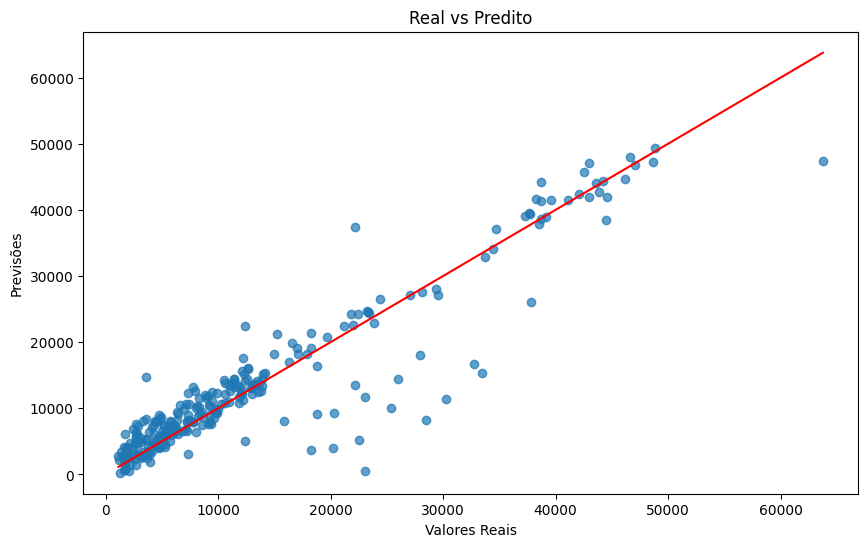

In [11]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize=(10,6))
_ = plt.scatter(y_test, y_pred, alpha=0.7)
_ = plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
_ = plt.xlabel('Valores Reais')
_ = plt.ylabel('Previsões')
_ = plt.title('Real vs Predito')
_ = plt.show()